In [2]:
import audioflux as af
import numpy as np
import matplotlib.pyplot as plt

In [31]:
audio_arr, sample_rate = af.read('data/one.wav')

In [45]:
from audioflux.type import (SpectralFilterBankScaleType, SpectralFilterBankStyleType,
                            WindowType, SpectralDataType)
obj = af.BFT(num=2049, radix2_exp=12, samplate=sample_rate, low_fre=0., high_fre=1200.,
             window_type=WindowType.HANN, slide_length=1024,
             scale_type=SpectralFilterBankScaleType.LINEAR,
             style_type=SpectralFilterBankStyleType.SLANEY,
             data_type=SpectralDataType.POWER)

In [46]:
spec_arr = obj.bft(audio_arr)

In [47]:
spec_arr = np.abs(spec_arr)

In [48]:
spec_arr.shape

(2049, 11036)

In [19]:
%%time
spec_obj = af.MelSpectrogram(num=1024,
                             samplate=sample_rate,
                             low_fre = 50,
                             high_fre = 16000,
                             radix2_exp=12)
spec_arr = spec_obj.spectrogram(audio_arr)
spec_dB_arr = af.utils.power_to_db(spec_arr)

CPU times: total: 2.94 s
Wall time: 3.02 s


In [20]:
spec_obj.get_bin_band_length()

1024

In [21]:
spec_obj.get_fre_band_arr()[160:210]

array([521.07324, 524.7755 , 528.4891 , 532.2138 , 535.9498 , 539.69727,
       543.45605, 547.2262 , 551.0077 , 554.8007 , 558.60535, 562.4214 ,
       566.2491 , 570.0884 , 573.9393 , 577.8019 , 581.6761 , 585.5622 ,
       589.46   , 593.36957, 597.291  , 601.2245 , 605.1698 , 609.127  ,
       613.0963 , 617.0775 , 621.071  , 625.0764 , 629.094  , 633.1239 ,
       637.1659 , 641.2202 , 645.2868 , 649.36566, 653.457  , 657.5606 ,
       661.6767 , 665.8053 , 669.9464 , 674.10004, 678.26636, 682.44525,
       686.6368 , 690.841  , 695.05804, 699.28784, 703.53046, 707.7861 ,
       712.0543 , 716.33563], dtype=float32)

In [22]:
spec_obj.__dict__

{'_obj': <audioflux.spectrogram.LP_OpaqueSpectrogram at 0x257652856c0>,
 '_lib': <WinDLL 'C:\Users\chompu\.conda\envs\spectogram\Lib\site-packages\audioflux\lib\libaudioflux.dll', handle 7ffbd8fe0000 at 0x25762fd7b20>,
 '_is_created': True,
 'num': 1024,
 'samplate': 48000,
 'low_fre': 50,
 'high_fre': 16000,
 'bin_per_octave': 12,
 'radix2_exp': 12,
 'window_type': <WindowType.HANN: 1>,
 'slide_length': 1024,
 'is_continue': False,
 'data_type': <SpectralDataType.POWER: 0>,
 'filter_bank_type': <SpectralFilterBankType.MEL: 2>,
 'style_type': <SpectralFilterBankStyleType.SLANEY: 0>,
 'normal_type': <SpectralFilterBankNormalType.NONE: 0>,
 'fft_length': 4096,
 'deep_order': 1}

In [23]:
spec_obj

In [24]:
obj.bft(spec_obj)

AttributeError: 'MelSpectrogram' object has no attribute 'bft'

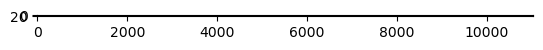

In [58]:
plt.imshow(spec_arr[15:40])

In [49]:
spec_arr.shape

(2049, 11036)

In [50]:
def make_img(ims):
    new = []
    for row in ims:
        for i in range(20):
            new.append(row)
    return np.array(new)

C:\Users\chompu\AppData\Local\Temp\ipykernel_10316\1069267684.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(spec_arr[::-1]), cmap='inferno')


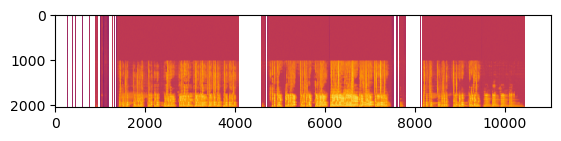

In [54]:
plt.imshow(np.log(spec_arr[::-1]), cmap='inferno')

In [83]:
new = make_img(spec_arr[::-1])

C:\Users\chompu\AppData\Local\Temp\ipykernel_10316\706520426.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(spec_arr[::-1]))#np.log(new)


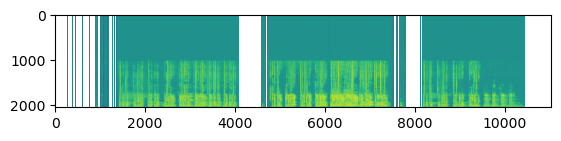

In [52]:
plt.imshow(np.log(spec_arr[::-1]))#np.log(new)

In [ ]:
plt.specgram(np.log(spec_arr[::-1]), Fs=512, cmap="rainbow")

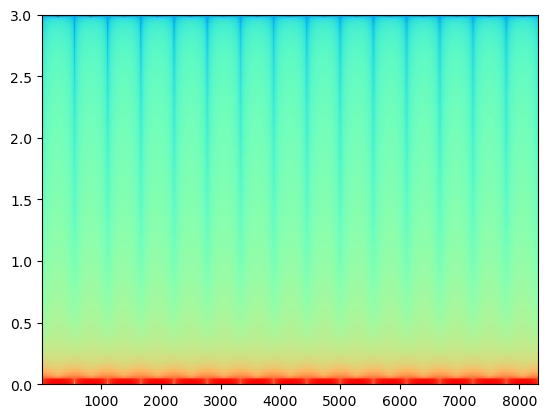

In [91]:
# the the generated signal.
Time_difference = 0.0001
 
# Generating an array of values
Time_Array = np.linspace(0, 5, int(np.ceil(5 / Time_difference)))
 
# Actual data array which needs to be plot
Data = 20*(np.sin(3 * np.pi * Time_Array))
 
# Matplotlib.pyplot.specgram() function to
# generate spectrogram
plt.specgram(Data, Fs=6, cmap="rainbow");

In [93]:
Data.shape

(50000,)

<Axes: title={'center': 'MelSpectrogram'}, xlabel='Time'>

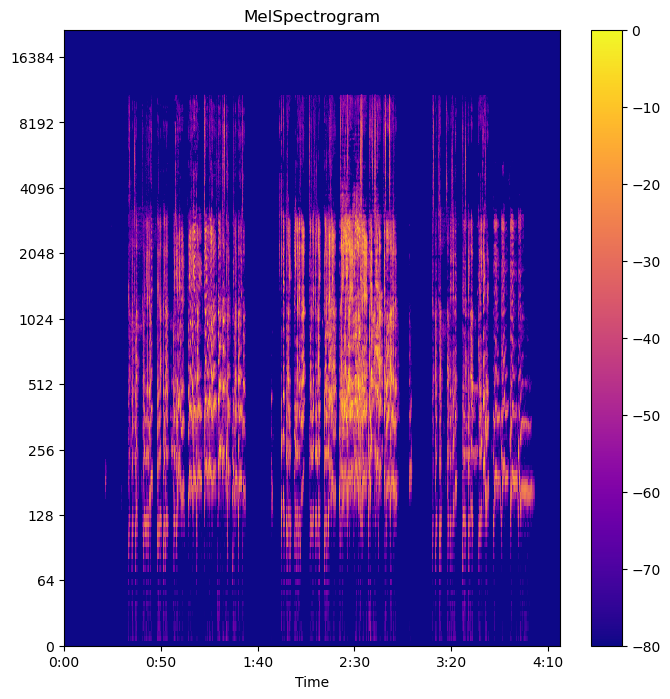

In [11]:
from audioflux.display import Plot
audio_len = audio_arr.shape[-1]
pt = Plot()
pt.add_spec_data(spec_dB_arr,
                 x_coords=spec_obj.x_coords(audio_len),
                 y_coords=spec_obj.y_coords(),
                 scale='log', title='MelSpectrogram')